# seaborn (barplot) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.8.1


## read miles per gallon dataset (mpg.csv)

In [3]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


## wide format

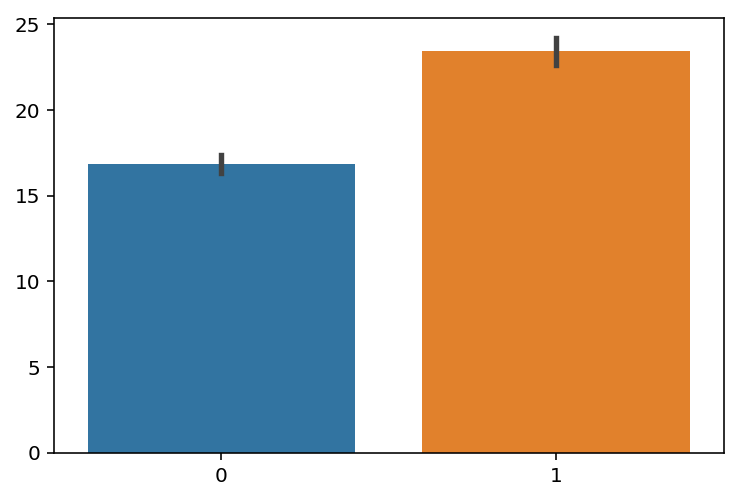

In [5]:
sns.barplot(data=[df.cty, df.hwy])
# notice: no x-axis label

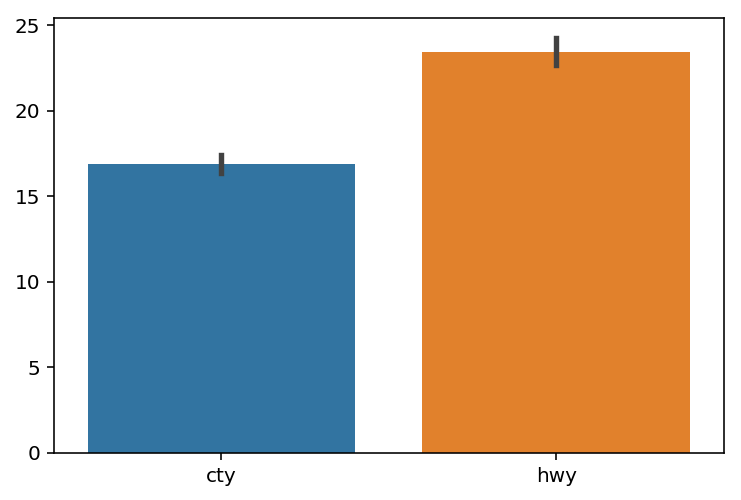

In [6]:
# wide format
sns.barplot(data=df[['cty', 'hwy']]) # with correct x-axis label

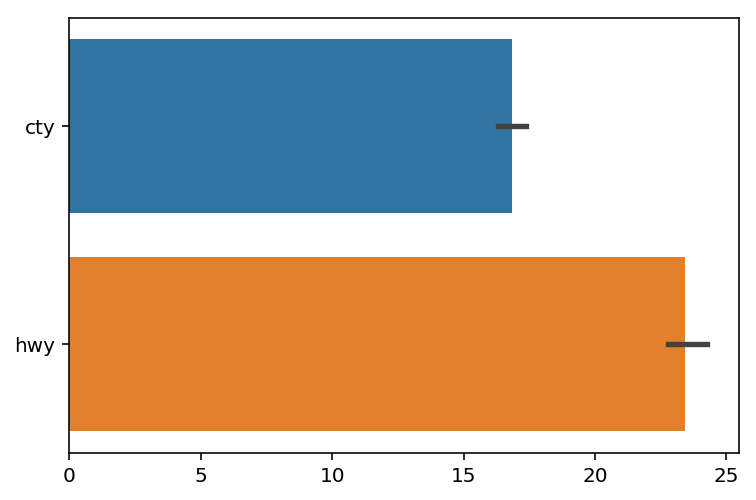

In [7]:
sns.barplot(data=df[['cty', 'hwy']], orient='h') # with correct x-axis label

## long format

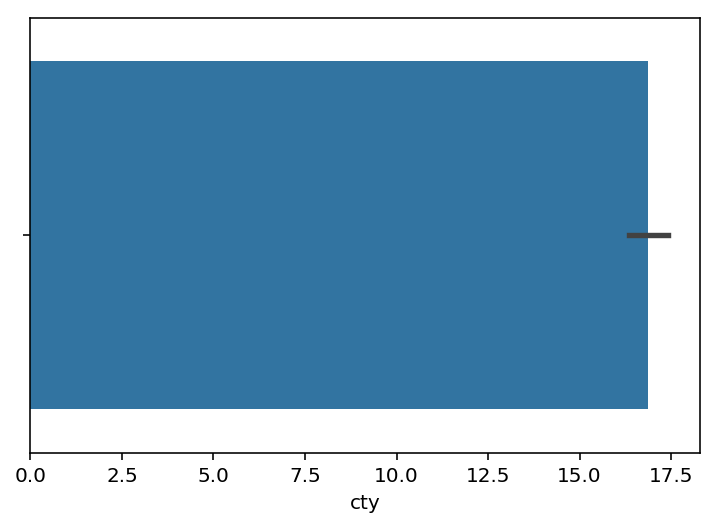

In [8]:
sns.barplot(x='cty', data=df)

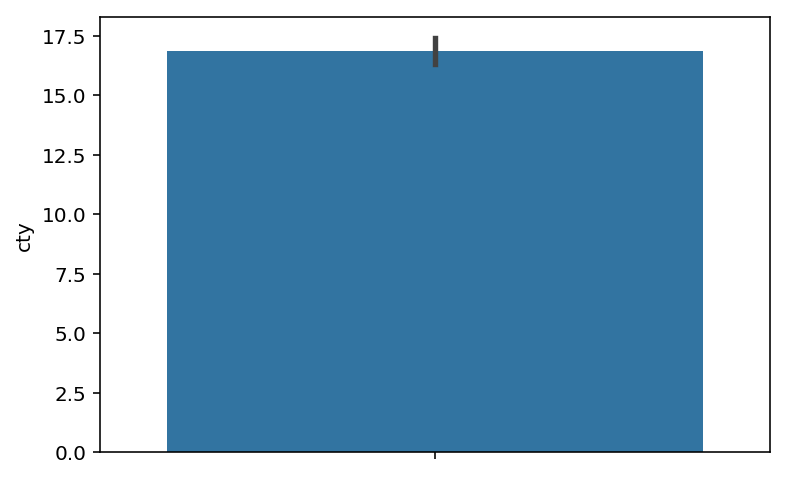

In [9]:
sns.barplot(y='cty', data=df)

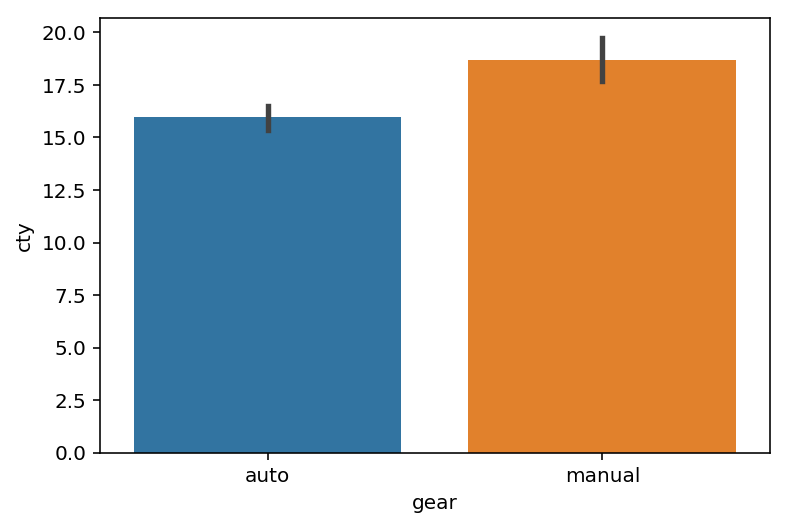

In [10]:
sns.barplot(x='gear', y='cty', data=df)

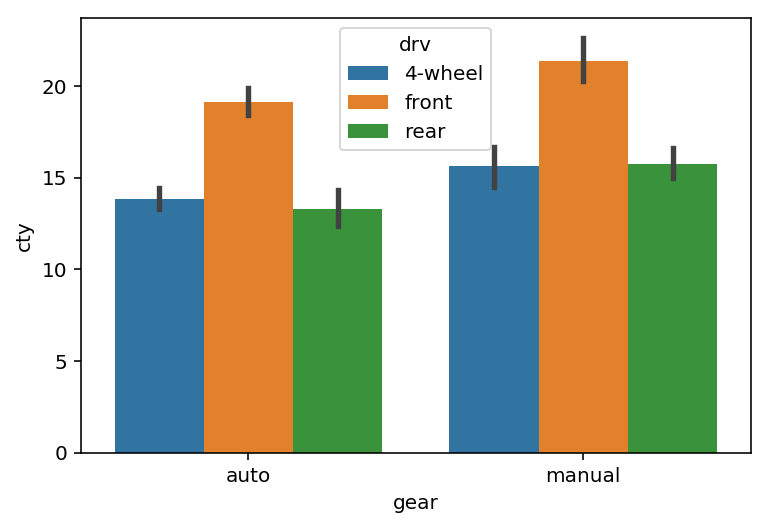

In [11]:
sns.barplot(x='gear', y='cty', data=df,
            hue='drv')

### set 'estimator'

In [12]:
df.groupby('drv')['cty'].describe()

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4-wheel,103.0,14.330097,2.874459,9.0,13.0,14.0,16.0,21.0
front,106.0,19.971698,3.626510,11.0,18.0,19.0,21.0,35.0
rear,25.0,14.080000,2.215852,11.0,12.0,15.0,15.0,18.0


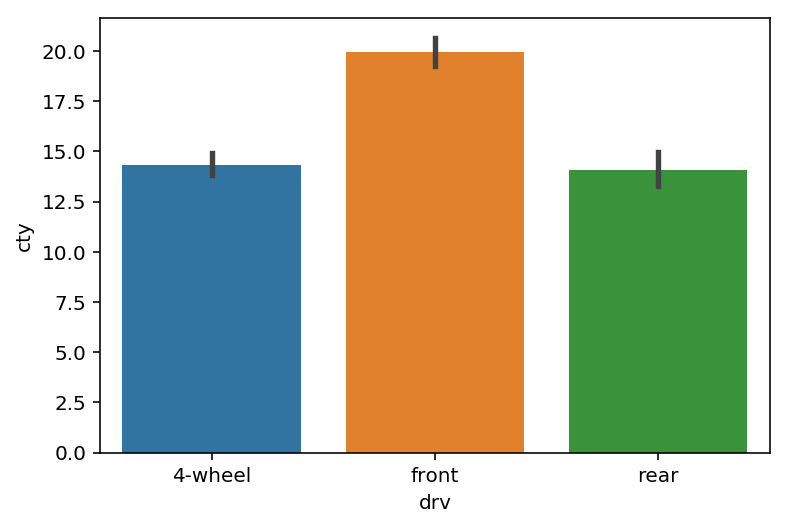

In [13]:
sns.barplot(x='drv', y='cty', data=df)

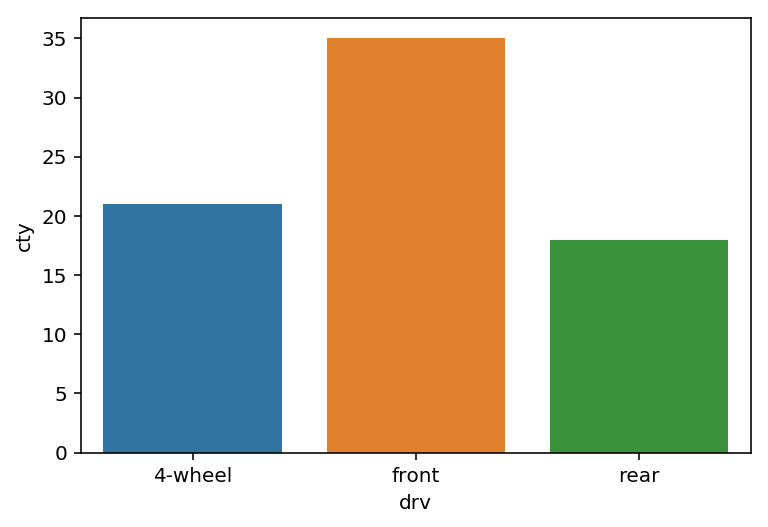

In [14]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=max,
            ci=None)

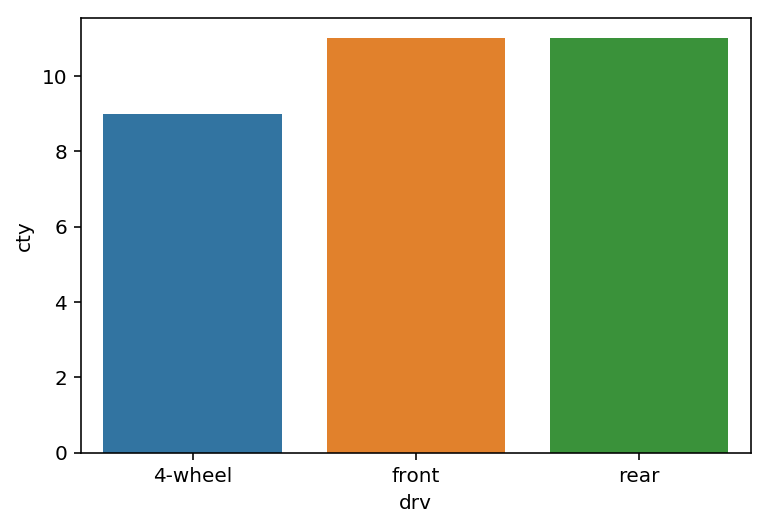

In [15]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=min,
            ci=None)

In [16]:
import numpy as np

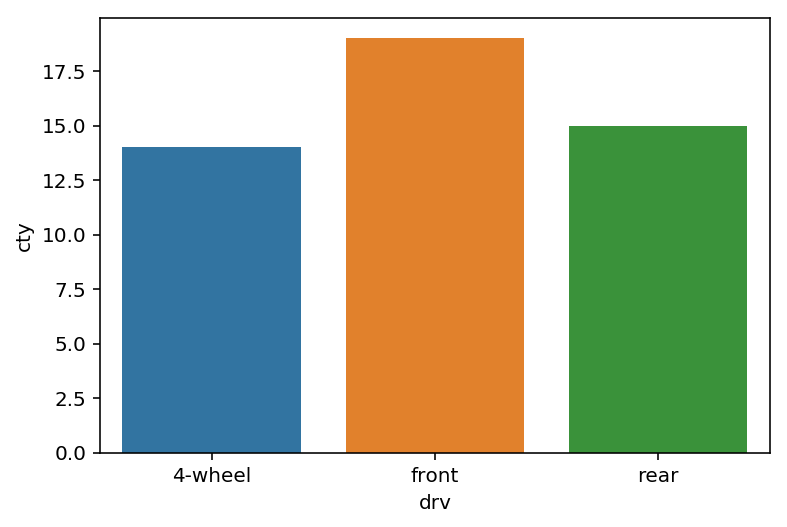

In [17]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=np.median,
            ci=None)

### add an average line

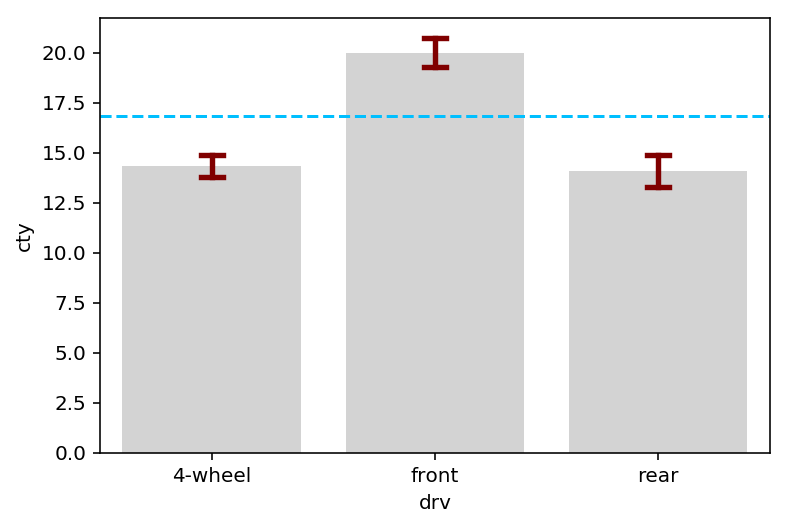

In [18]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            errcolor='maroon', capsize=.1)
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

### custom order and errorbar (ex. sd)

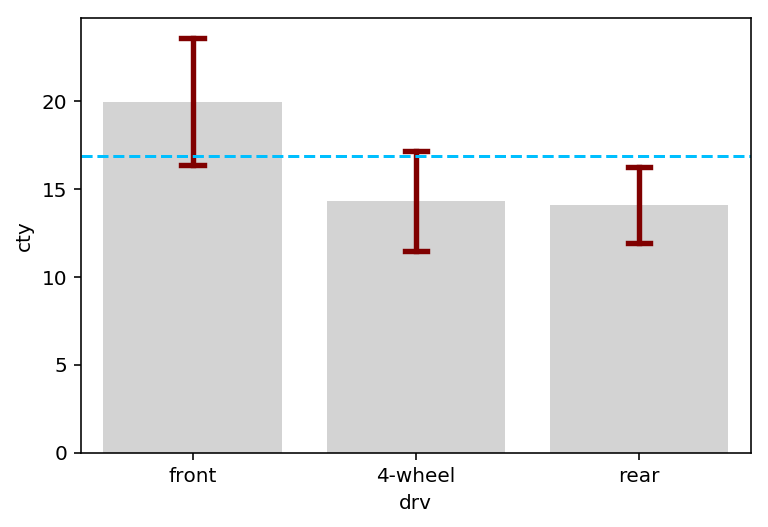

In [19]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'])
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

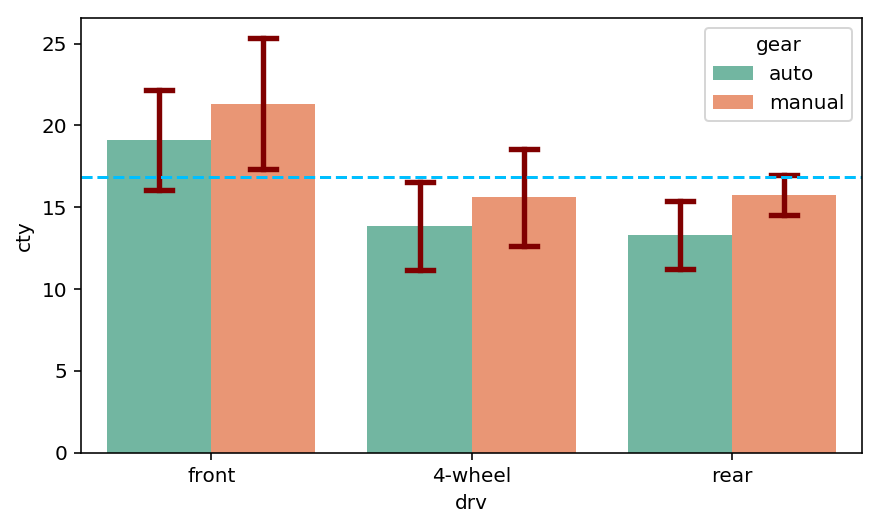

In [20]:
avg=df.cty.mean()
plt.figure(figsize=(7,4))
sns.barplot(x='drv', y='cty', data=df, 
            hue='gear',
            palette='Set2', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'],
       )
plt.axhline(y=avg, color='deepskyblue', linestyle='--')
# plt.savefig('bar2.png', dpi=150)
# plt.savefig('bar_a4.pdf', papertype='a4')
# plt.savefig('bar.svg')

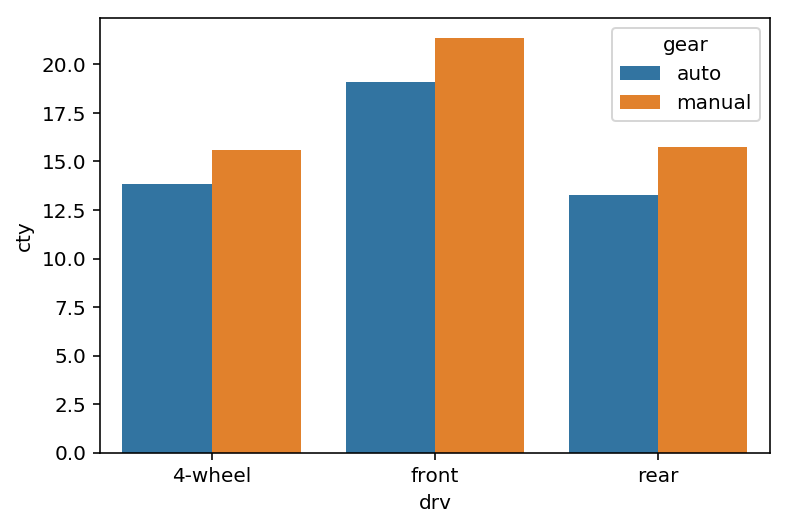

In [21]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', ci=None)

### palette

Text(0.5,1,'fuel efficiency by drive wheels')

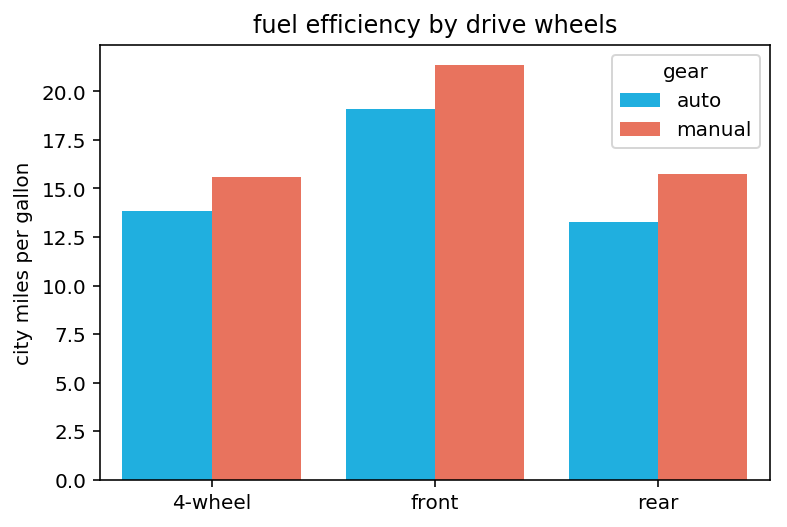

In [22]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette=['deepskyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels')

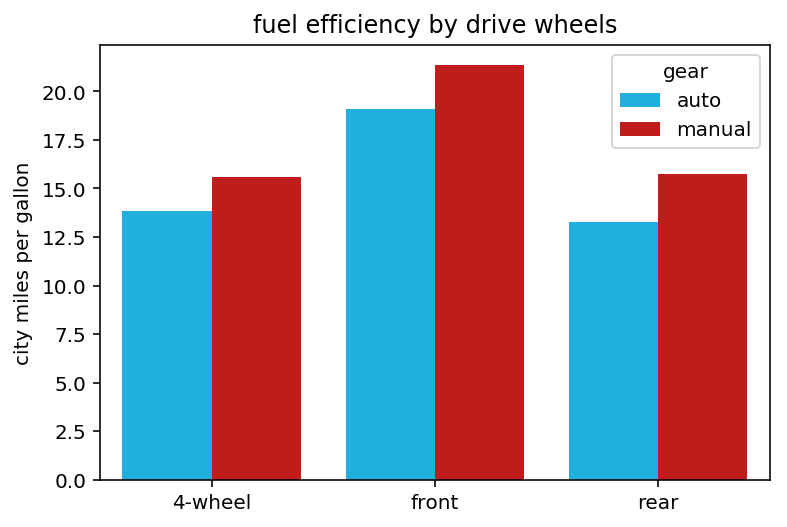

In [23]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette={'auto':'deepskyblue', 'manual':'#dd0000'})
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels');

### factorplot

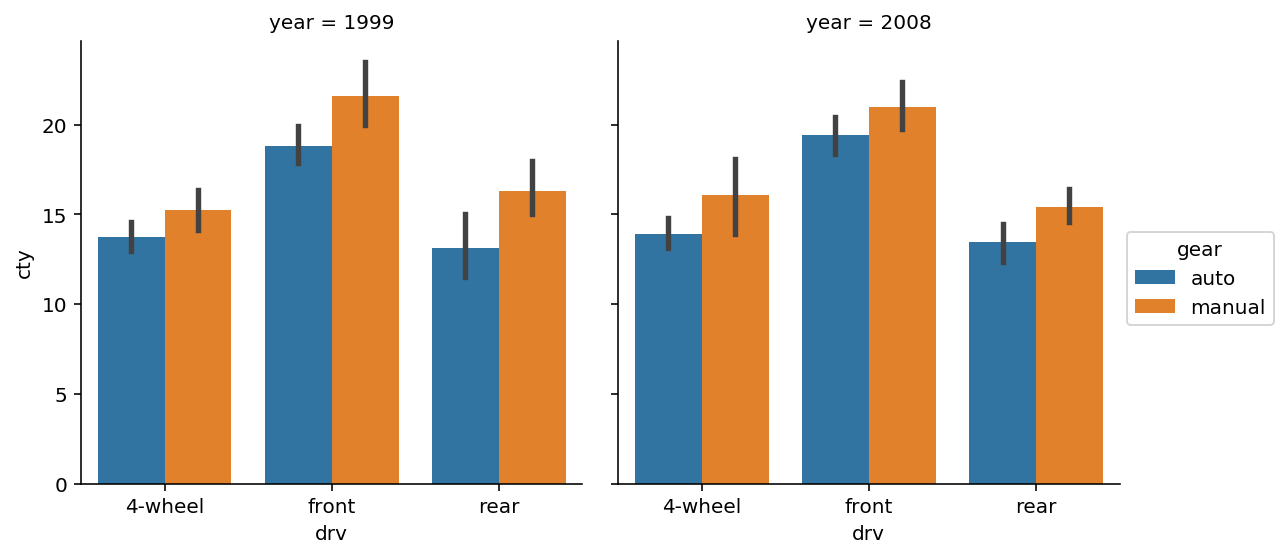

In [24]:
sns.factorplot(x='drv', y='cty', data=df,
               hue="gear", 
               col="year",
               kind="bar",
               size=4, aspect=1);

In [25]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [26]:
df[df['class'].str.match('compact|suv|midsize')].sample(frac=.05)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
208,volkswagen,gti,2.0,1999,4,auto(l4),front,19,26,r,compact,auto
160,subaru,forester awd,2.5,1999,4,auto(l4),4-wheel,18,24,r,suv,auto
35,chevrolet,malibu,3.5,2008,6,auto(l4),front,18,29,r,midsize,auto
191,toyota,camry solara,3.0,1999,6,manual(m5),front,18,26,r,compact,manual
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),rear,12,17,r,suv,auto
5,audi,a4,2.8,1999,6,manual(m5),front,18,26,p,compact,manual
163,subaru,forester awd,2.5,2008,4,auto(l4),4-wheel,20,26,r,suv,auto
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4-wheel,14,17,r,suv,auto


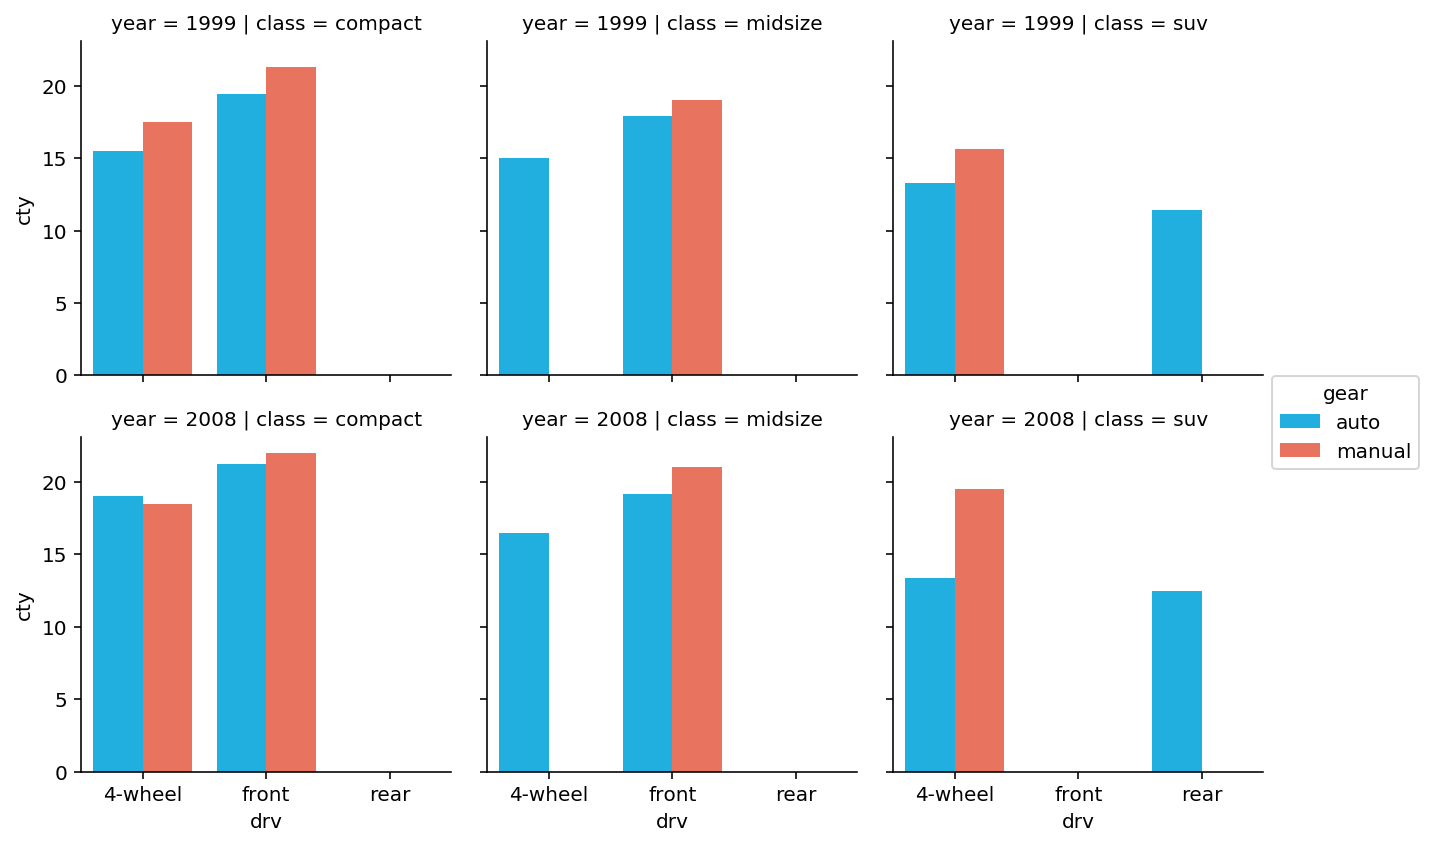

In [27]:
sns.factorplot(x='drv', y='cty', data=df[df['class'].str.match('compact|suv|midsize')],
               hue='gear', 
               row='year',
               col='class',
               kind='bar',
               ci=None,
               palette=['deepskyblue', 'tomato'],
               size=3, aspect=1);